<a href="https://colab.research.google.com/github/srilekhaj/Langchain-with-AI-agents/blob/main/Imgclassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("image classfication")

image classfication


In [ ]:
# prompt: write a code CNN model using PyTorch python  to classify product images into categories (e.g., electronics, clothing)

print("image classfication")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.models as models

# Define the CNN model
class ProductClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ProductClassifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)  # Use a pre-trained ResNet
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.resnet(x)
        return x

# Define hyperparameters
num_classes = 2  # Number of product categories (e.g., electronics, clothing)
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
train_dataset = datasets.ImageFolder(root='/root/dataset/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create the model, optimizer, and loss function
model = ProductClassifier(num_classes)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train the model
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Save the trained model
torch.save(model.state_dict(), 'product_classifier.pth')

In [2]:
# prompt: you need write a code for cnn model for image classification categorizing the image electronics and clothing based on that the user need to get recommendation of product using python

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.models as models
from PIL import Image
print("image classfication")


# Define the CNN model
class ProductClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ProductClassifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)  # Use a pre-trained ResNet
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.resnet(x)
        return x

# Define hyperparameters
num_classes = 2  # Number of product categories (e.g., electronics, clothing)
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
train_dataset = datasets.ImageFolder(root='/root/dataset/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create the model, optimizer, and loss function
model = ProductClassifier(num_classes)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Train the model
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Save the trained model
torch.save(model.state_dict(), 'product_classifier.pth')


# Function to get product recommendations based on image classification
def get_recommendations(image_path):
    # Load the trained model
    model = ProductClassifier(num_classes)
    model.load_state_dict(torch.load('product_classifier.pth'))
    model.eval()

    # Load and preprocess the image
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add a batch dimension

    # Perform classification
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # Get the predicted product category
    predicted_category = predicted.item()

    # Provide recommendations based on the predicted category
    if predicted_category == 0:  # Electronics
        recommendations = [
            "Laptop", "Smartphone", "Headphones", "Smart TV", "Tablet"
        ]
    elif predicted_category == 1:  # Clothing
        recommendations = [
            "T-Shirt", "Jeans", "Dress", "Shoes", "Jacket"
        ]
    else:
        recommendations = ["No recommendations available."]

    return recommendations


# Example usage:
image_path = "/root/dataset/test/clothing/image1.jpg"
recommendations = get_recommendations(image_path)
print("Recommendations:", recommendations)

image classfication


FileNotFoundError: Found no valid file for the classes .ipynb_checkpoints. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

In [ ]:
# prompt: what are the module need to install

!pip install torch torchvision

In [ ]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.3/838.3 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.models as models
print("image classfication")

image classfication


In [4]:
# Define the CNN model
class ProductClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ProductClassifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)  # Use a pre-trained ResNet
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.resnet(x)
        return x


In [5]:
# Define hyperparameters
num_classes = 2  # Number of product categories (e.g., electronics, clothing)
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [8]:
# Load the dataset
# Remove the .ipynb_checkpoints directory if it exists
import os
checkpoint_dir = os.path.join('/root/dataset/train', '.ipynb_checkpoints')
if os.path.exists(checkpoint_dir) and os.path.isdir(checkpoint_dir):
    os.rmdir(checkpoint_dir)

train_dataset = datasets.ImageFolder(root='/root/dataset/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [9]:
# Create the model, optimizer, and loss function
model = ProductClassifier(num_classes)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 140MB/s]


In [10]:
# Train the model
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Save the trained model
torch.save(model.state_dict(), 'product_classifier.pth')


Epoch [1/10], Loss: 0.0662
Epoch [2/10], Loss: 0.0242
Epoch [3/10], Loss: 0.0003
Epoch [4/10], Loss: 0.0093
Epoch [5/10], Loss: 0.1009
Epoch [6/10], Loss: 0.8000
Epoch [7/10], Loss: 0.0062
Epoch [8/10], Loss: 0.0690
Epoch [9/10], Loss: 0.4405
Epoch [10/10], Loss: 0.0262


In [14]:
# Function to get product recommendations based on image classification
def get_recommendations(image_path):
    # Load the trained model
    model = ProductClassifier(num_classes)
    model.load_state_dict(torch.load('product_classifier.pth'))
    model.eval()

    # Load and preprocess the image
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add a batch dimension

    # Perform classification
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # Get the predicted product category
    predicted_category = predicted.item()

    # Provide recommendations based on the predicted category
    if predicted_category == 0:  # Electronics
        recommendations = [
            "T-Shirt", "Jeans", "Dress", "Shoes", "Jacket"        ]
    elif predicted_category == 1:  # Clothing
        recommendations = [
            "Laptop", "Smartphone", "Headphones", "Smart TV", "Tablet"

        ]
    else:
        recommendations = ["No recommendations available."]

    return recommendations



In [16]:

# Example usage:
image_path = "/root/dataset/test/clothing/image1.jpg"
recommendations = get_recommendations(image_path)
print("Recommendations:", recommendations)

Recommendations: ['T-Shirt', 'Jeans', 'Dress', 'Shoes', 'Jacket']


<ipython-input-14-42b556158b81>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('product_classifier.pth'))


<ipython-input-27-b959518fe16b>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('product_classifier.pth'))


Recommendations: ['T-Shirt', 'Jeans', 'Dress', 'Shoes', 'Jacket']
Recommended Image Paths: ['/root/dataset/recommendations/clothing/image1.jpg', '/root/dataset/recommendations/clothing/image2.jpg', '/root/dataset/recommendations/clothing/image3.jpg', '/root/dataset/recommendations/clothing/image4.jpg', '/root/dataset/recommendations/clothing/image5.jpg']


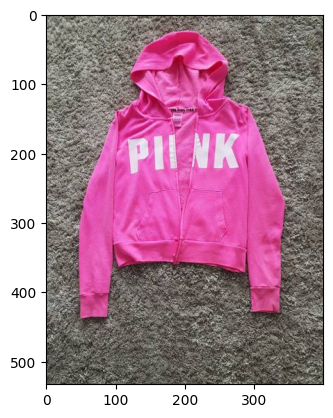

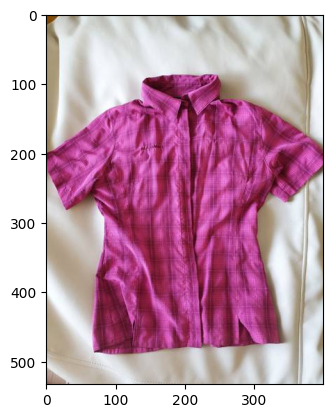

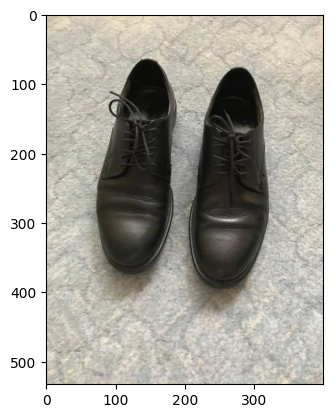

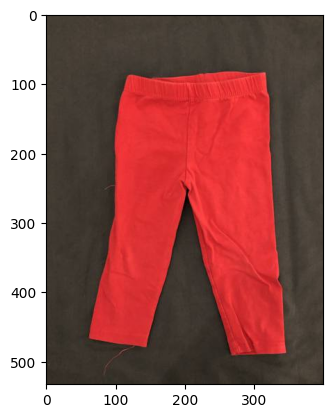

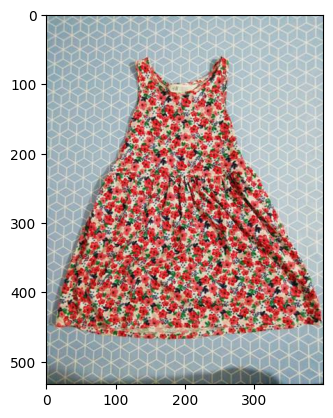

In [27]:
# prompt: generate image for the recommendations categorize between if image is electronics recommend electronics images, if it is clothing produced in python ml

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.models as models
from PIL import Image
import os

# ... (Your existing code for model training) ...

# Function to get product recommendations based on image classification
def get_recommendations(image_path):
    # Load the trained model
    model = ProductClassifier(num_classes)
    model.load_state_dict(torch.load('product_classifier.pth'))
    model.eval()

    # Load and preprocess the image
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add a batch dimension

    # Perform classification
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # Get the predicted product category
    predicted_category = predicted.item()

    # Provide recommendations based on the predicted category
    if predicted_category == 0:  # Electronics
        recommendations = [
           "T-Shirt", "Jeans", "Dress", "Shoes", "Jacket"
        ]
        # Assuming you have a directory with images of electronics products
        recommended_image_paths = [os.path.join("/root/dataset/recommendations/clothing", f"image{i}.jpg") for i in range(1, 6)]
    elif predicted_category == 1:  # Clothing
        recommendations = [
             "Laptop", "Smartphone", "Headphones", "Smart TV", "Tablet"
        ]
        # Assuming you have a directory with images of clothing products
        recommended_image_paths = [os.path.join("/root/dataset/recommendations/electronics", f"image{i}.jpg") for i in range(1, 6)]
    else:
        recommendations = ["No recommendations available."]
        recommended_image_paths = []

    return recommendations, recommended_image_paths


# Example usage:
image_path = "/root/dataset/test/clothing/image1.jpg"
recommendations, recommended_image_paths = get_recommendations(image_path)
print("Recommendations:", recommendations)
print("Recommended Image Paths:", recommended_image_paths)


# You can then display the recommended images in your application or notebook using a library like matplotlib
# Example:
import matplotlib.pyplot as plt
for path in recommended_image_paths:
    img = Image.open(path)
    plt.imshow(img)
    plt.show()